# 1) Use any open-source API to access some data in Jason format and then parse the Jason data and display it as some kind of dashboard.**

## A. When consuming APIs with Python, you may use python library: requests. With it, you should be able to do most, if not all, of the actions required to consume any public API (forexample open weather API or Random User Generator API, or traffic API etc.) below are
## some examples of the real-time APIs:
## i. Amazon Price
##ii. Fixer Currency
##iii. TheRunDown
##iv. OpenAPI 1.2
##v. Zillow
##vi. Sportspage Feeds
##vii. Nexmo Number Insight
##viii. Google Shopping




**For this question, I am using Fixer Currency as the real-time API.**

In [43]:
import requests
import pandas as pd

# Fetching the API key
api_key = 'b1747ebf599f362a0c003475c6b99892'
url = f"http://data.fixer.io/api/latest?access_key={api_key}"

# Make the API request
response = requests.get(url)
data = response.json()

# Check if the request was successful
if data['success']:
    # Extract the base currency and rates
    base_currency = data['base']
    rates = data['rates']

    # Convert the rates dictionary into a DataFrame for easy viewing
    rates_df = pd.DataFrame(list(rates.items()), columns=['Currency', 'Rate'])
    rates_df = rates_df.sort_values(by='Rate', ascending=False)

    # Display the DataFrame
    print(rates_df.head())  # Display top 5 rates for simplicity
else:
    print("Failed to fetch data:", data.get('error', {}).get('info', 'No error info available.'))


    Currency          Rate
154      VEF  3.852344e+06
85       LBP  9.526995e+04
69       IRR  4.473068e+04
156      VND  2.695804e+04
84       LAK  2.262803e+04


## B. To display the data you may use python library Dash or some other library.

In [14]:
pip install dash pandas plotly


In [44]:
import dash
from dash import html, dcc
import plotly.express as px
import pandas as pd

# Dummy data for the exchange rates
rates_df = pd.DataFrame({
    'Currency': ['VEF', 'LBP', 'IRR', 'VND', 'LAK'],
    'Rate': [3.85, 9.5, 4.47, 2.68, 2.26]
})

# Create a Dash application
app = dash.Dash(__name__)

# Define the layout of the application
app.layout = html.Div([
    html.H1('Currency Exchange Rates'),
    dcc.Graph(
        id='currency-rates',
        figure=px.bar(rates_df, x='Currency', y='Rate', title='Currency Exchange Rates')
    )
])

# Specify the port and ensure debug mode is on for development
if __name__ == '__main__':
    app.run_server(debug=True, port=8051)  # Change the port to 8051 or another if 8050 is in use


<IPython.core.display.Javascript object>

# 2) The data file diabetes.csv contains data of 768 patients. In this data there are 8 attributes (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, and Age) and 1 response variable (Outcome). The response variable, Outcome, has binary value (1 indicating the outcome is diabetes and 0 means no diabetes). For this assignment purposes we will consider this data as a population. Use this data to perform the following:

## a) set a seed (to ensure work reproducibility) and take a random sample of 25 observations and find the mean Glucose and highest Glucose values of this sample and compare these statistics with the population statistics of the same variable. You should use charts for this comparison.

In [33]:
import pandas as pd

# Load the diabetes data from the CSV file

data = pd.read_csv('/content/diabetes.csv')

# Display the first few rows of the dataframe and the structure of the dataframe
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [36]:
data.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [37]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


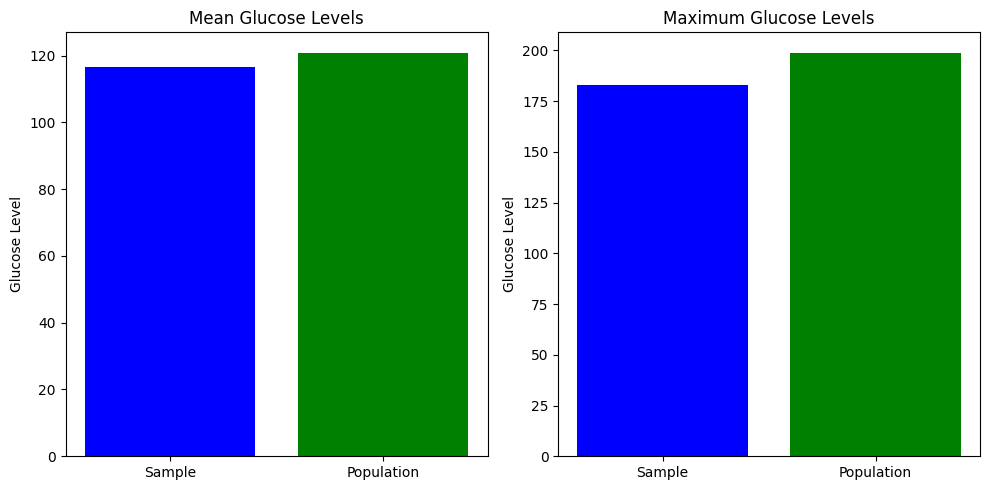

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Set seed for reproducibility and sample data
np.random.seed(42)
sample_a = data.sample(25)

# Calculate mean and maximum glucose levels for the sample and population
sample_mean_glucose = sample_a['Glucose'].mean()
sample_max_glucose = sample_a['Glucose'].max()
population_mean_glucose = data['Glucose'].mean()
population_max_glucose = data['Glucose'].max()

# Visualization
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # Mean glucose levels
plt.bar(['Sample', 'Population'], [sample_mean_glucose, population_mean_glucose], color=['blue', 'green'])
plt.title('Mean Glucose Levels')
plt.ylabel('Glucose Level')

plt.subplot(1, 2, 2)  # Maximum glucose levels
plt.bar(['Sample', 'Population'], [sample_max_glucose, population_max_glucose], color=['blue', 'green'])
plt.title('Maximum Glucose Levels')
plt.ylabel('Glucose Level')

plt.tight_layout()
plt.show()


## b) Find the 98th percentile of BMI of your sample and the population and compare the results using charts.

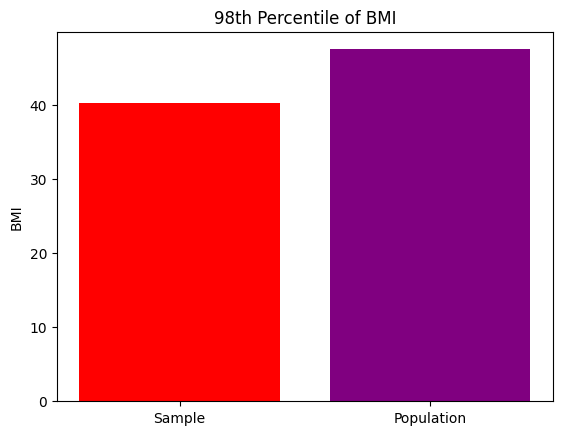

In [39]:
# Calculate the 98th percentile of BMI for the sample and population
percentile_98_sample = np.percentile(sample_a['BMI'], 98)
percentile_98_population = np.percentile(data['BMI'], 98)

# Visualization
plt.bar(['Sample', 'Population'], [percentile_98_sample, percentile_98_population], color=['red', 'purple'])
plt.title('98th Percentile of BMI')
plt.ylabel('BMI')
plt.show()


## c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the population and find the average mean, standard deviation and percentile for BloodPressure and compare this with these statistics from the population for the same variable. Again, you should create charts for this comparison. Report on your findings.

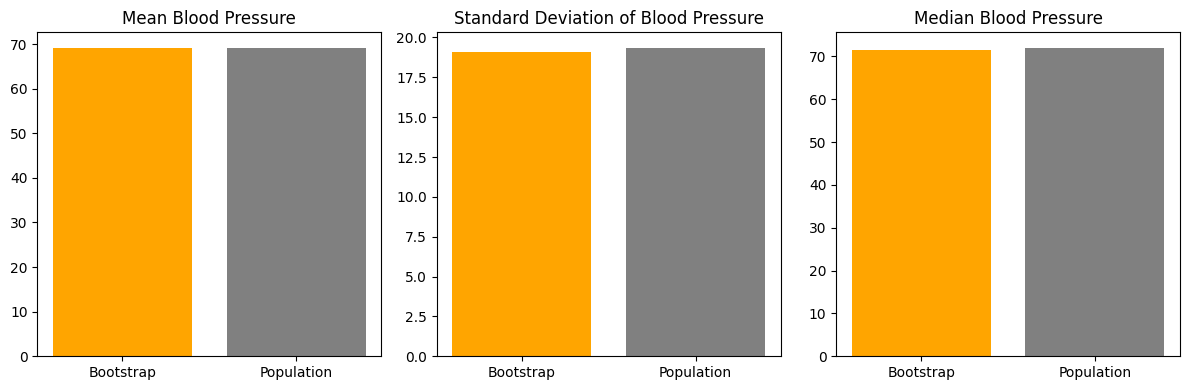

In [40]:
# Parameters for bootstrap
n_bootstrap_samples = 500
sample_size = 150

bootstrap_means = []
bootstrap_stds = []
bootstrap_medians = []

# Perform bootstrap sampling
for _ in range(n_bootstrap_samples):
    bootstrap_sample = data.sample(sample_size, replace=True)
    bootstrap_means.append(bootstrap_sample['BloodPressure'].mean())
    bootstrap_stds.append(bootstrap_sample['BloodPressure'].std())
    bootstrap_medians.append(np.percentile(bootstrap_sample['BloodPressure'], 50))

# Calculate population statistics for comparison
population_mean_bp = data['BloodPressure'].mean()
population_std_bp = data['BloodPressure'].std()
population_median_bp = np.percentile(data['BloodPressure'], 50)

# Visualization
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.bar(['Bootstrap', 'Population'], [np.mean(bootstrap_means), population_mean_bp], color=['orange', 'grey'])
plt.title('Mean Blood Pressure')

plt.subplot(1, 3, 2)
plt.bar(['Bootstrap', 'Population'], [np.mean(bootstrap_stds), population_std_bp], color=['orange', 'grey'])
plt.title('Standard Deviation of Blood Pressure')

plt.subplot(1, 3, 3)
plt.bar(['Bootstrap', 'Population'], [np.mean(bootstrap_medians), population_median_bp], color=['orange', 'grey'])
plt.title('Median Blood Pressure')

plt.tight_layout()
plt.show()


## Different Visualizations for the dataset.

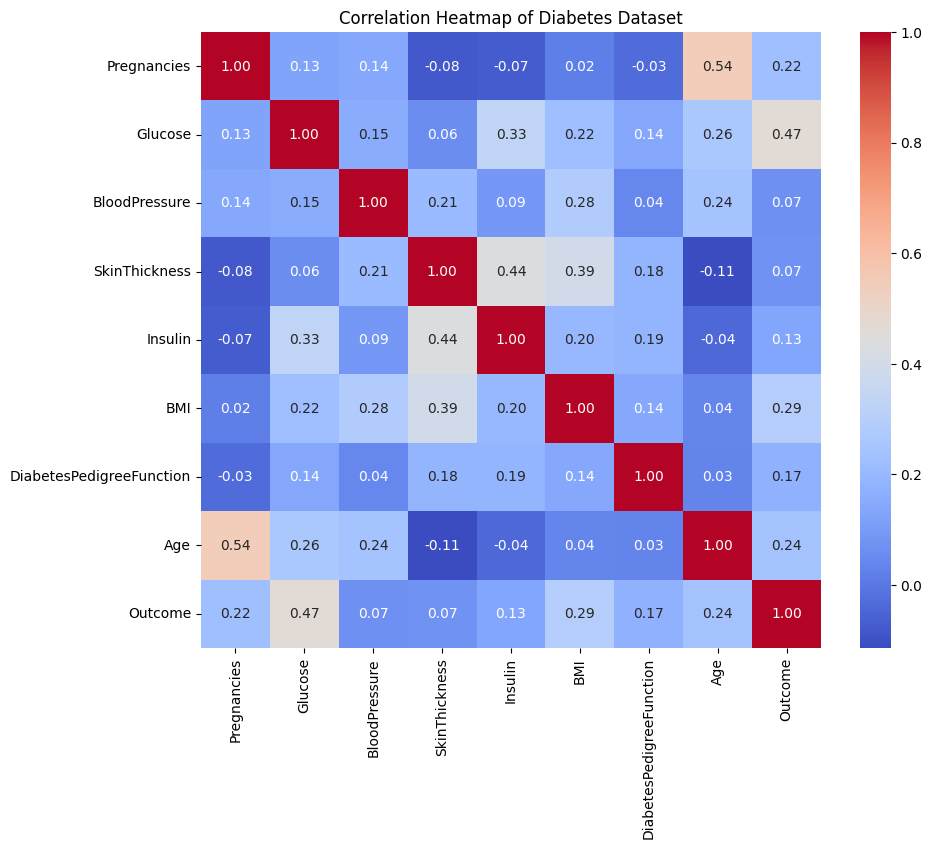

In [41]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Diabetes Dataset')
plt.show()


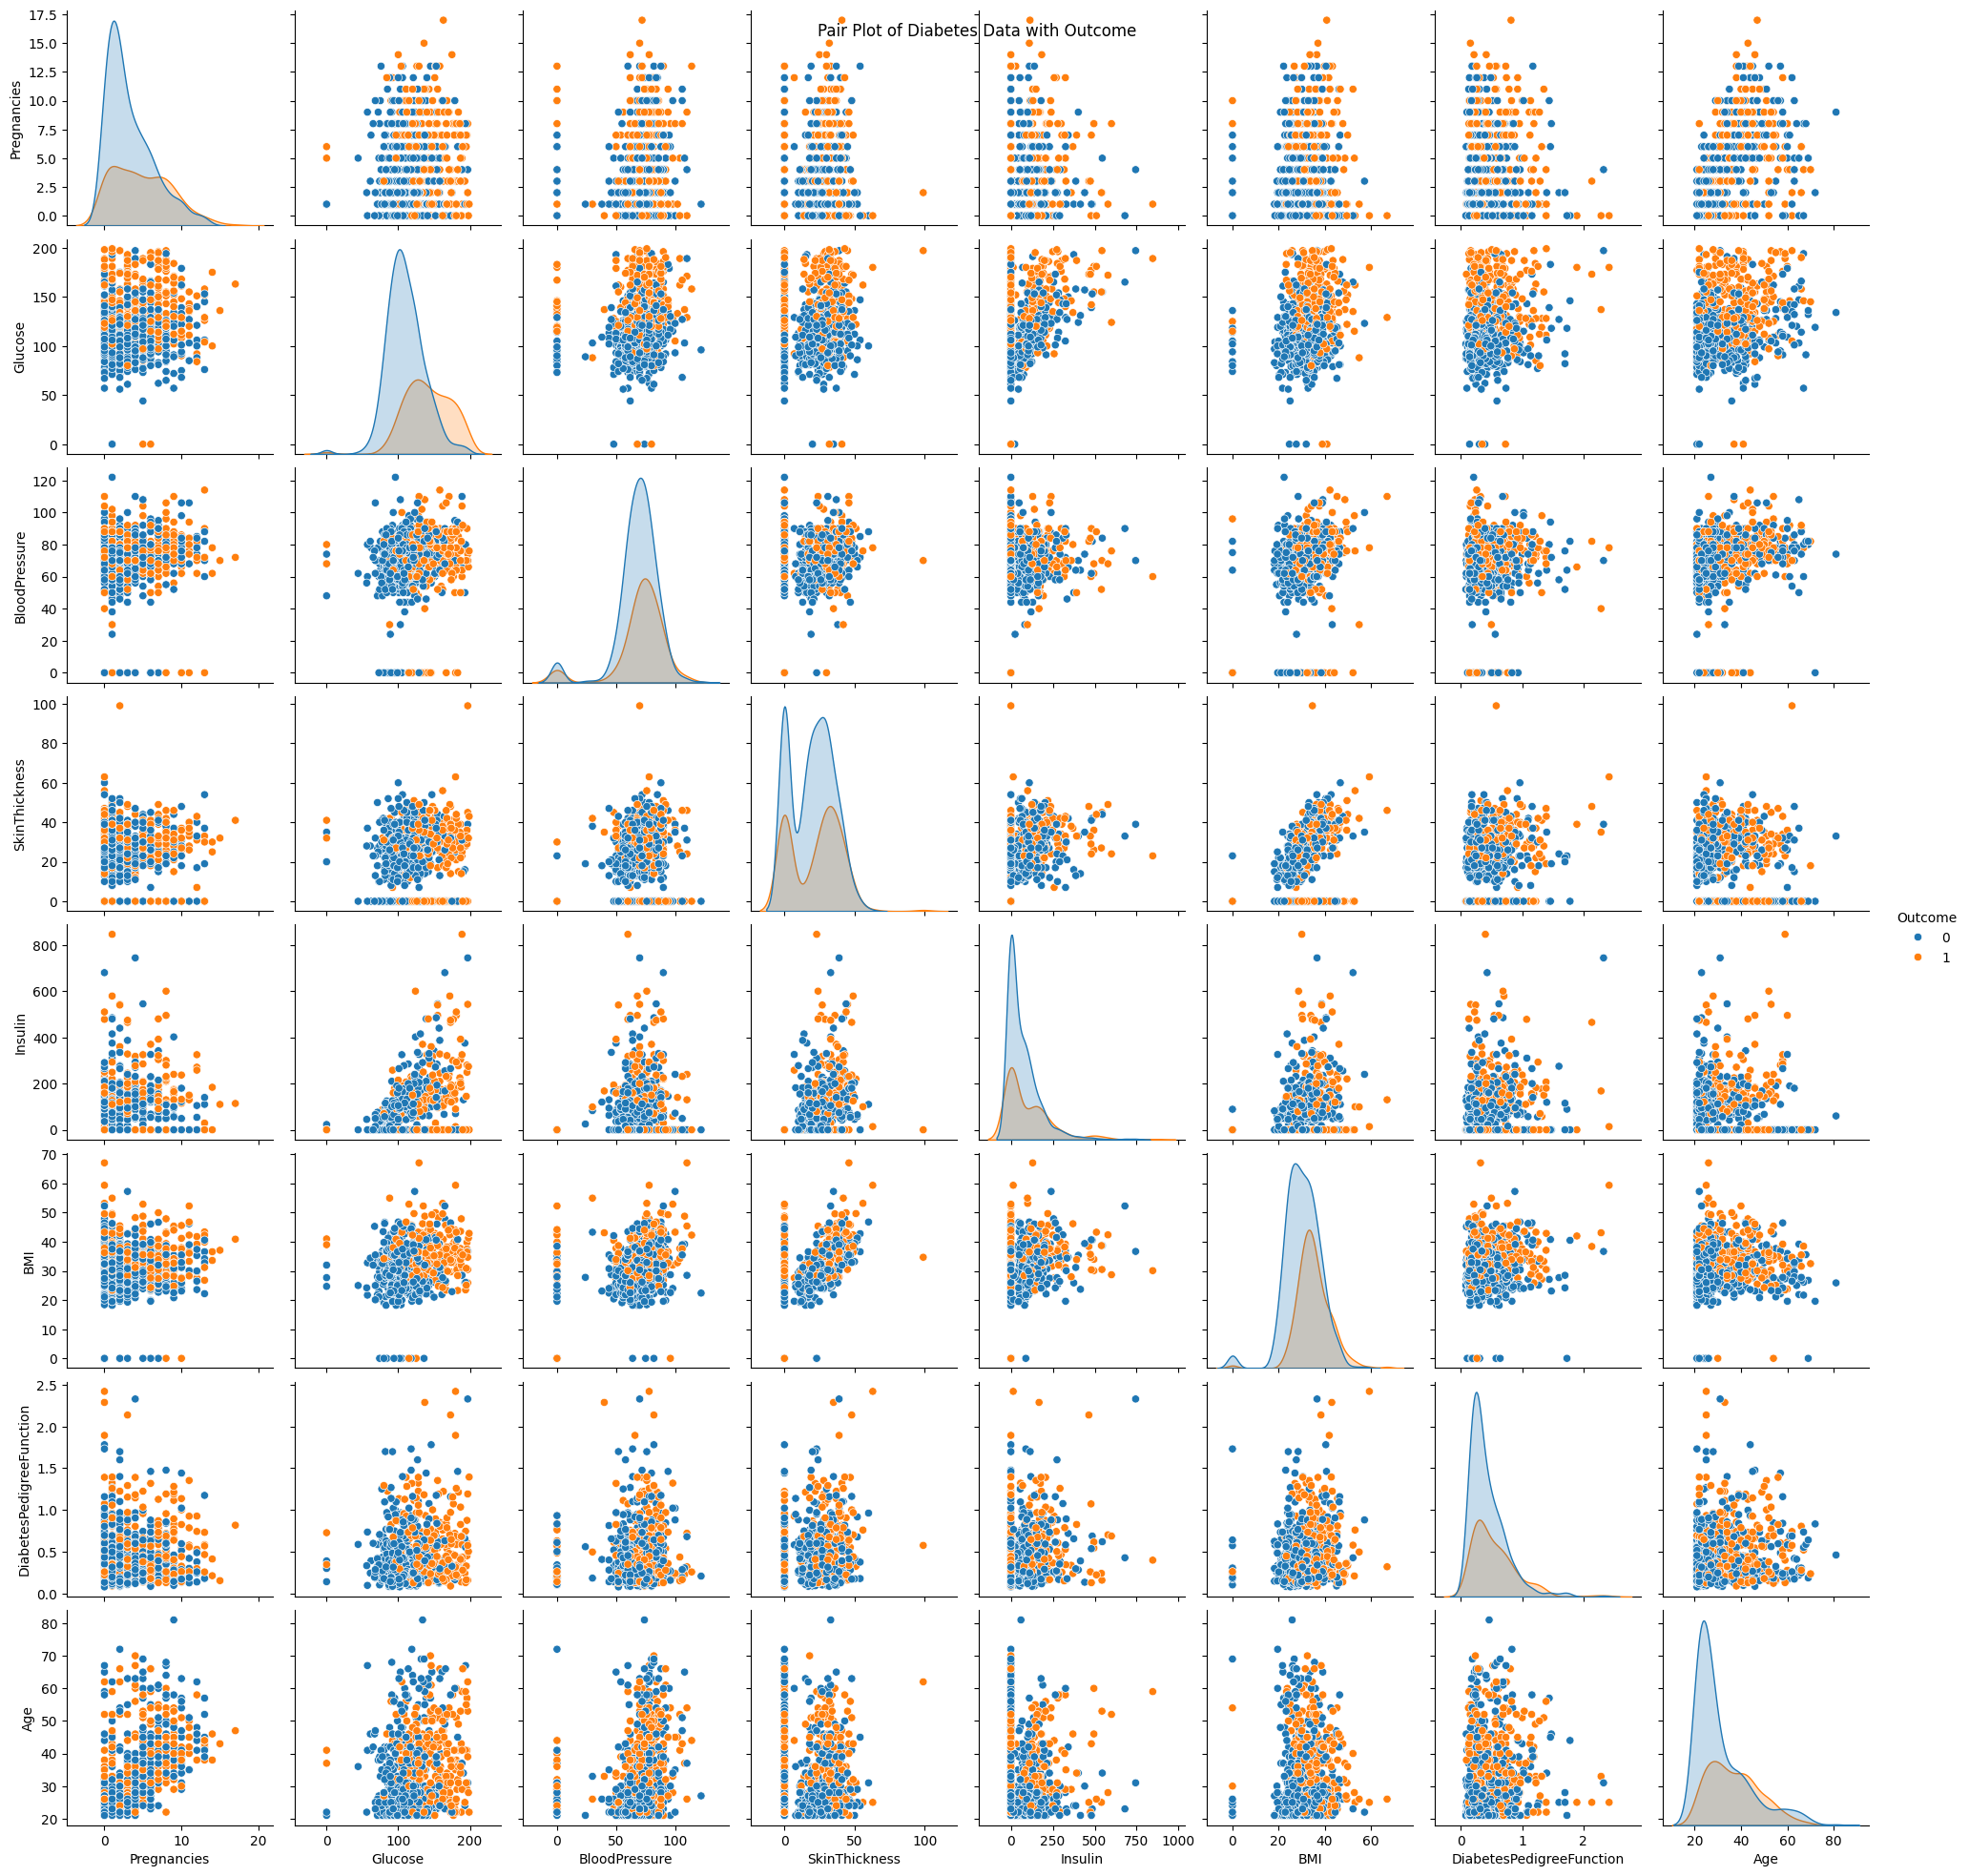

In [42]:
sns.pairplot(data, hue='Outcome', diag_kind='kde')
plt.suptitle('Pair Plot of Diabetes Data with Outcome')
plt.show()
